# Credit Card Products for AllLife Bank: Strategies for expansion of customer base

## Introduction
<p> The AllLife Bank has two focus areas for the next financial year: (a) run targeted and personalized campaigns to bring in new customers and upsell their products to existing customers, (b) upgrade the credit card services delivery model so that customer service enquires are resolved faster to ultimately increase customer satisfaction.</p>
<p> Background: The AllLife Bank was advised by their market research teams that there is scope to increase/expand the customer base for the bank's products in the financial market. In addition, the operations team at AllLife Bank had received feedback from market research teams that the current customer service does not have good quality and customers rate them poorly. Hence, the Head of Marketing and Head of Delivery reached out to the data science team to develop strategies for the above two focus areas. </p>

### Objective
<ol>
    <li>Identifying spending habits and customer service interactions for existing customers. </li>
    <li> Developing strategies to improve the credit card services that will increase customer satisfaction with the products.</li>
    <li>Generating insights and recommendations for the bank to target new customers.</li>

### Data Information/Variables
<p> <strong>SI_No</strong> - primary key for the customer records<br>
    <strong>Customer Key</strong> - this is the customer identification number<br>
    <strong>Avg_Credit_Limit</strong> - average credit limit for each customer for all credit cards<br>
    <strong>Total_Credit_Cards</strong> - the total number of credit cards a customer has<br>
    <strong>Total_visits_bank</strong> - the total number of visits that the customer made to the bank annually<br>
    <strong>Total_visits_online</strong> - online logins or total number of visits for customer annually/yearly<br>
    <strong>Total_calls_made</strong> - the yearly number of calls made by the customer to the bank/customer service department<br>
    </p>

### The analysis below has the following sections:
<ol>
    <li> Loading and importing packages </li>
    <li> Removing warnings from python notebooks </li>
    <li> Loading the dataset </li>
    <li> Preview of the dataset </li>
    <li> Descriptive statistics for the dataset </li>
    <li> Exploratory Data Analysis - univariate, bivariate and multivariate analysis,insights based on EDA </li>
    <li> Data preprocessing/model preparation - feature engineering, missing value   treatment, outlier treatment, duplicate observations treatment</li>
    <li> <strong>K-means clustering</strong> - applying K-means clustering, elbow curve, silhoutte score, analysis for appropriate number of clusters, cluster profiling </li>
    <li> <strong>Hierarchical clustering </strong> - applying hierarchical clustering, linkage methods, dendograms, analysis for appropriate number of clusters, cluster profiling</li>
    <li> <strong>Comparison of K-means clustering and Hierarchical clustering </strong> - comparison of the two clustering techniques </li>
    <li> Insights and recommendations for the bank </li>

## 1. Loading and importing packages

In [1]:
# Import the necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


sns.set(color_codes=True)  # For background of the graphs
%matplotlib inline

# For previewing the data, the columns can be set to limit of None and 100 for the rows.
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 100)

# To be used for data preprocessing for clustering
from sklearn.preprocessing import StandardScaler

# To compute distances between two groups for K-means clustering
from scipy.spatial.distance import cdist

# To perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# For visualization of the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# For calculation of pairwise distances for hierarchical clustering
from scipy.spatial.distance import pdist

# For hierarchical clustering: to calculate cophenetic correlation, and generate dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

# For automatic structuring/beautification of the python notebook
#%load_ext nb_black

### 2. Removing warnings from python notebook

In [2]:
# Removing warnings from the notebook
import warnings

warnings.filterwarnings("ignore")

### 3. Loading the dataset

In [3]:
# The dataset is stored in a xlsx file and we want to read it into a pandas dataframe
# By visual inspection of the excel sheet, we know the dataset is in sheet 0. 
customerData = pd.read_excel("Credit Card Customer Data.xlsx",sheet_name=0)
print(
 f"The dataframe has {customerData.shape[0]} rows and {customerData.shape[1]} columns."
)
# Using f-string to print the statement for performance reasons

The dataframe has 660 rows and 7 columns.


### 4. Previewing the dataset

In [4]:
# Preview of 10 random rows of the dataset
# To see random 10 rows, numpy's random seed was used.
# Putting random.seed to be 1 will return the same random 10 rows everytime we execute the code.
np.random.seed(1)
customerData.sample(n=10)
# The Reason we want to return random rows is so that we can see  the typical values from a random sample.

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
547,548,38125,26000,4,5,2,4
353,354,94437,9000,5,4,1,3
499,500,65825,68000,6,4,2,2
173,174,38410,9000,2,1,5,8
241,242,81878,10000,4,5,1,3
341,342,70779,18000,4,3,2,0
647,648,79953,183000,9,0,9,2
218,219,28208,19000,3,1,5,7
120,121,16577,10000,4,2,4,6
134,135,31256,13000,4,1,5,7


#### Observation
<p> The data has 660 rows and 7 columns. This includes the SI_No which is the primary key for the record as well as the Customer Key that is the customer identification number. At first glance, we can see that Avg_Credit_Limit has units of dollars, so the values are large numbers, while Total_Credit_Cards and the remaining columns are single digit values. This indicates that scaling will be required for clustering analysis (otherwise distance calculations will be primarily be influenced by Avg_Credit_Limit only). </p>

In [5]:
# To see data types and non-null counts for all the columns
customerData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


#### Observation
<p> There are no columns that have missing values. All the columns have int64 for type, so there are no categorical variables for this dataset. </p>

### 5. Descriptive statistics for the dataset

In [6]:
# Before starting preprocessing, a look at summary statistics
customerData.describe().T  # taking transpose since it is easier to view

,count,mean,std,min,25%,50%,75%,max
Sl_No,660.0,330.500000,190.669872,1.0,165.75,330.5,495.25,660.0
Customer Key,660.0,55141.443939,25627.772200,11265.0,33825.25,53874.5,77202.50,99843.0
Avg_Credit_Limit,660.0,34574.242424,37625.487804,3000.0,10000.00,18000.0,48000.00,200000.0
Total_Credit_Cards,660.0,4.706061,2.167835,1.0,3.00,5.0,6.00,10.0
Total_visits_bank,660.0,2.403030,1.631813,0.0,1.00,2.0,4.00,5.0
Total_visits_online,660.0,2.606061,2.935724,0.0,1.00,2.0,4.00,15.0
Total_calls_made,660.0,3.583333,2.865317,0.0,1.00,3.0,5.00,10.0


#### Observations 
<ol>
    <li> The columns SI_No and Customer Key can be ignored for summary statistics as there are identifier information for the customers.</li>
    <li> The mean and median for 'Avg_Credit_Limit' variable is 34,574.24 and 18,000 approximately. The units are likely dollars for this variable. Since the mean and median are different and the tail is on the right hand side, the distribution is going to be a right skewed distribution. The minimum was 3000 dollars and the maximum was 200,000 dollars. While this range is quite large, 75% of the customers had an average credit limit of 48,000 dollars. </li>
    <li> On an average, each customer held 4.7 credit card products. The mean Total_Credit_Cards was 5 indicating a symmetric distribution for this variable. 75% of AllLife bank's customers possessed 6 credit cards. </li> 
    <li> The customers made an average of 2.4 visits to the bank annually. The median Total_visits_bank is 2.0 so this indicates a fairly symmetric distribution as well. The maximum visits to the bank by any customer was 5.0. </li>
    <li> The Total_visits_online had a mean of 2.6 and a median of 2.0 - a symmetric distribution again. The maximum logins for customers was 15 while the minimum was 0, indicating that some customers had never logged into their bank account. </li>
    <li> With regards to customer service, the mean of Total_Calls_made was 3.58 in a year, and the median was 3.0 calls made per year (symmetric distribution). The minimum was 0 and the maximum was 10 calls in a year to the bank or customer service department.</li>
    </ol>

### 6. Exploratory Data Analysis - univariate, bivariate and multivariate analysis

In [7]:
# Copy the dataframe
customerData1 = customerData.copy()

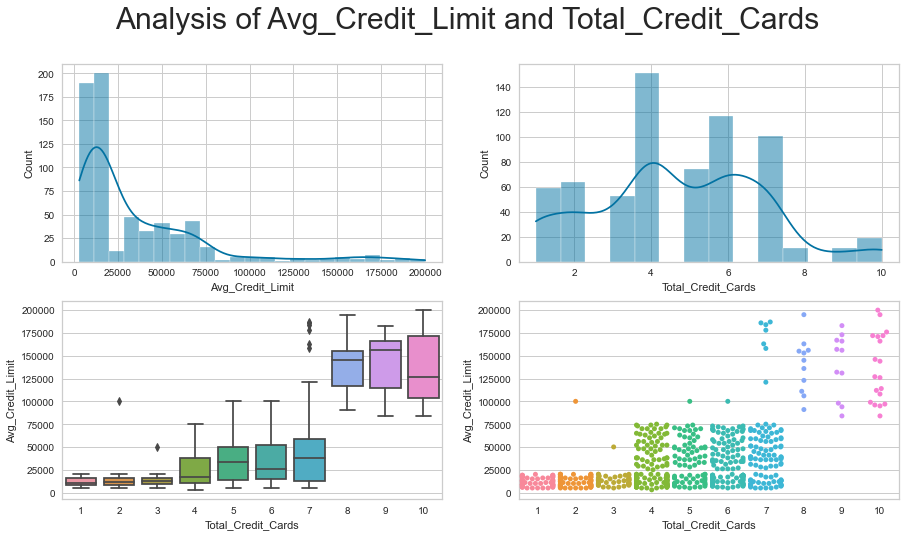

In [8]:
# Univariate and bivariate analysis

# We can start with analysis of histograms of Avg_Credit_Limit and Total_Credit_Cards
# Both variables here are continuous variables

# Display histogram and boxplots and swarmplots for Avg_Credit_Limit analysis and Total_Credit_Cards
# Make a grid of 3 rows and 2 columns
fig, axs = plt.subplots(2, 2, figsize=(15, 8))
# Put a figure title
fig.suptitle("Analysis of Avg_Credit_Limit and Total_Credit_Cards", fontsize=30)
# Histogram of Avg_Credit_Limit variable
sns.histplot(ax=axs[0, 0], data=customerData1, x="Avg_Credit_Limit", kde=True)
# Histogram of Total_Credit_Cards variable
sns.histplot(ax=axs[0, 1], data=customerData1, x="Total_Credit_Cards", kde=True)
# Box plot for Avg_Credit_Limit and Total_Credit_Cards
sns.boxplot(
    ax=axs[1, 0],
    data=customerData1,
    x=customerData1["Total_Credit_Cards"],
    y=customerData1["Avg_Credit_Limit"],
);
# Swarm plot for Avg_Credit_Limit and Total_Credit_Cards
sns.swarmplot(ax =axs[1,1],data = customerData1, x = 'Total_Credit_Cards',y='Avg_Credit_Limit');
# We put semicolons to supress the axis output

#### Observations
<ol>
    <li> The histogram for Avg_Credit_Limit is a right skewed distribution (tail is on the right). This indicates that the count of customers who have a higher credit limit are much less than the customers who have lower credit limits. </li>
    <li> The highest peak for the histogram for Avg_Credit_Limit is around 0 to 30,000 dollars for credit limit. This is followed by a significant drop off but another shallow peak can be discerned around 30,000 to 75,000 dollars and then the distribution tapers off. Based on this, we can roughly see three groups of customers - (a) the group of customers who have average credit limit between 0 and 30,000 dollars, (b) the group for 30,000 to 75,000 dollars and then the last group (c) the high credit limit customers that are 75,000 to 200,000 dollars. </li>
    <li> For Total_Credit_Cards, the distribution is multi-modal, but the peaks are not well separated. However, we can observe that the highest count of customers had about 4 credit card products. Very few customers had more than 8 credit card products. </li>
    <li> The box plot for Avg_Credit_Limit and Total_Credit_Cards shows that there are a few outliers for customers who had 2,3,7 total credit cards. However, it is possible for these values to be real and meaningful (instead of data collection errors). For example, a customer who has 7 credit cards may have an average credit limit of 175,000 dollars over all the credit cards). </li>
    <li> The median Avg_Credit_Limit for customers who have Total_Credit_Cards as 8,9 and 10 are significantly different from the group of customers who have 4,5,6,7 creit card products. But within the group of customers who have 8,9 or 10 credit cards, the median credit limit are not significantly different. </li>
    <li> The spread of boxes for the box plots for customers who have 1,2,3 credit cards is very small as compared to the groups of customers who have 4,5,6,7 credit cards and 8,9,10 products. </li>
    <li> The swarm plot between Avg_Credit_Limit and Total_Credit_Cards shows that we can identify about three distinct group of customers with respect to the two variables, but also that overap exists for the two groups of customers with 1,2,3 products and 4,5,6,7 products. Note, even though swarm plots are for categorical variables, variables in this data set like Total_Credit_Cards have discrete values between 1 and 10, so we can use the swarm plot to see the distribution.</li>
    </ol>

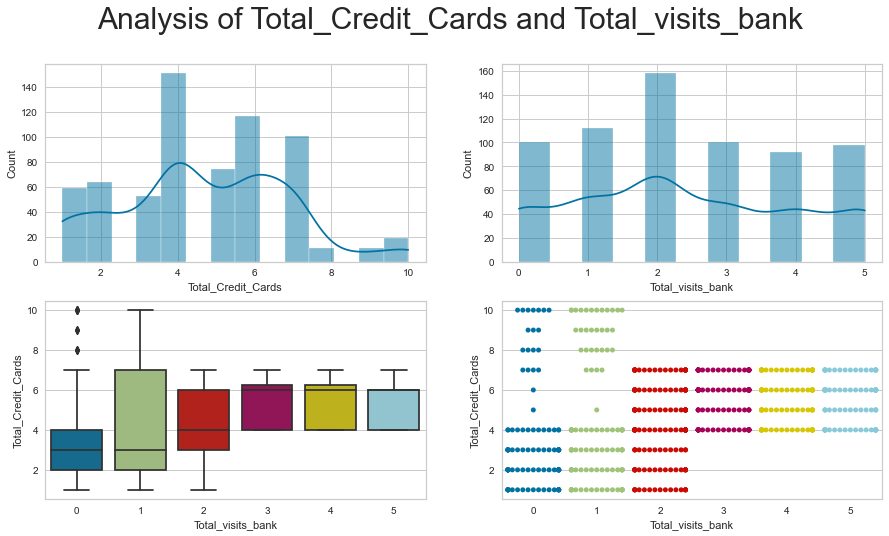

In [9]:
# Univariate and bivariate analysis

# Analysis of histograms of Total_Credit_Cards and Total_visits_bank
# Both variables here are continuous variables

# Display histogram and boxplots and swarmplots for Total_Credit_Cards analysis and Total_visits_bank
# Make a grid of 3 rows and 2 columns
fig, axs = plt.subplots(2, 2, figsize=(15, 8))
# Put a figure title
fig.suptitle("Analysis of Total_Credit_Cards and Total_visits_bank", fontsize=30)
# Histogram of Avg_Credit_Limit variable
sns.histplot(ax=axs[0, 0], data=customerData1, x="Total_Credit_Cards", kde=True)
# Histogram of Total_Credit_Cards variable
sns.histplot(ax=axs[0, 1], data=customerData1, x="Total_visits_bank", kde=True)
# Box plot for Avg_Credit_Limit and Total_Credit_Cards
sns.boxplot(
    ax=axs[1, 0],
    data=customerData1,
    x=customerData1["Total_visits_bank"],
    y=customerData1["Total_Credit_Cards"],
);
# Swarm plot for Avg_Credit_Limit and Total_Credit_Cards
sns.swarmplot(ax =axs[1,1],data = customerData1, x = 'Total_visits_bank',y='Total_Credit_Cards');
# We put semicolons to supress the axis output

#### Observations
<ol>
    <li> The histograms for Total_Credit_Cards and Total_visits_bank do not show well separated peaks. The highest count of customers were customers who had made 2 visits to the bank. </li>
    <li> The box plot for Total_Credit_Cards and Total_visits_bank shows three outliers for customers who did not visit the bank at all. These customers had 8,9 or 10 credit cards. This is possible, hence these outliers can be considered to be real data. The spread is maximum for customers who visitsed the bank atleast once a year. </li>
    <li> The swarmplot shows that customers who had more visits to the bank also had more than 4-7 credit card products. </li></ol>

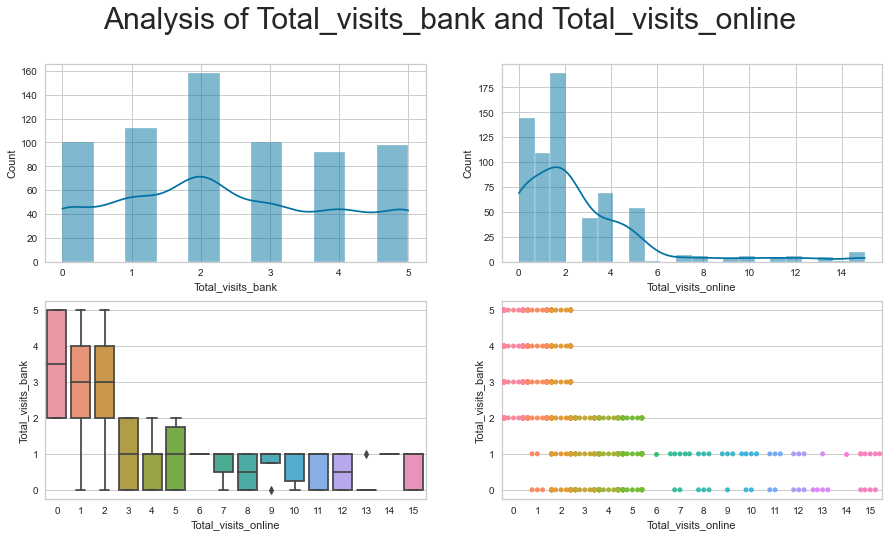

In [10]:
# Univariate and bivariate analysis

# Analysis of histograms of Total_visits_bank and Total_visits_online
# Both variables here are continuous variables

# Display histogram and boxplots and swarmplots for Total_visits_bank analysis and Total_visits_online
# Make a grid of 3 rows and 2 columns
fig, axs = plt.subplots(2, 2, figsize=(15, 8))
# Put a figure title
fig.suptitle("Analysis of Total_visits_bank and Total_visits_online", fontsize=30)
# Histogram of Avg_Credit_Limit variable
sns.histplot(ax=axs[0, 0], data=customerData1, x="Total_visits_bank", kde=True)
# Histogram of Total_Credit_Cards variable
sns.histplot(ax=axs[0, 1], data=customerData1, x="Total_visits_online", kde=True)
# Box plot for Avg_Credit_Limit and Total_Credit_Cards
sns.boxplot(
    ax=axs[1, 0],
    data=customerData1,
    x=customerData1["Total_visits_online"],
    y=customerData1["Total_visits_bank"],
);
# Swarm plot for Avg_Credit_Limit and Total_Credit_Cards
sns.swarmplot(ax =axs[1,1],data = customerData1, x = 'Total_visits_online',y='Total_visits_bank');
# We put semicolons to supress the axis output

#### Observations
<ol>
    <li> The Total_visits_online is a right skewed distribution, and the highest count of customers who logged an online visit was about 2 times a year. The Total_visits_bank shows a slight peak at 2 visits to the bank. </li>
    <li> The customers who did not log any online visits had the highest count of personal visits to the bank. Overall, the median for customers who had 0,1,2 online visits was significantly different than the rest of the customers. </li>
    <li> The swarm plot shows 2 groups of customers with respect to Total_visits_bank: customers who logged an online visits 0,1 or 2 times per year and customers who had 3 or more online visits per year. </li>

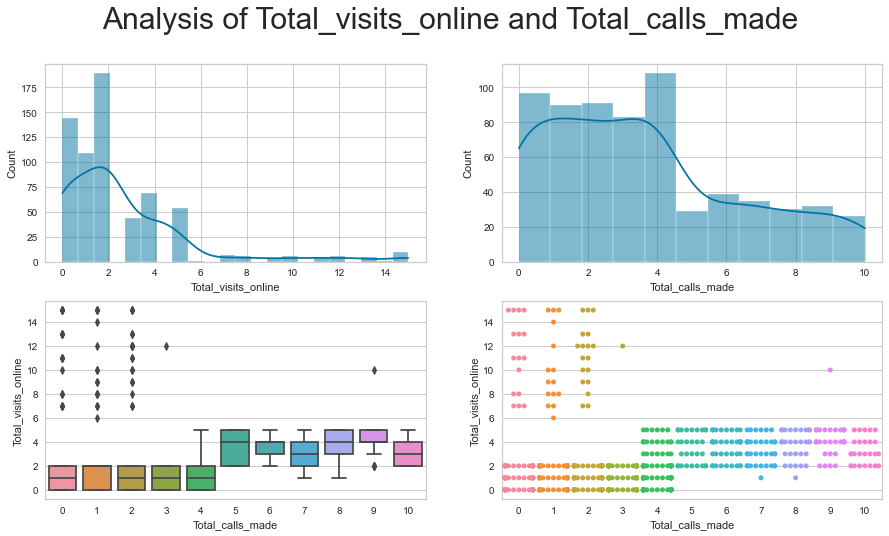

In [11]:
# Univariate and bivariate analysis

# Analysis of histograms of Total_visits_online and Total_calls_made
# Both variables here are continuous variables

# Display histogram and boxplots and swarmplots for Total_visits_online analysis and Total_calls_made
# Make a grid of 3 rows and 2 columns
fig, axs = plt.subplots(2, 2, figsize=(15, 8))
# Put a figure title
fig.suptitle("Analysis of Total_visits_online and Total_calls_made", fontsize=30)
# Histogram of Avg_Credit_Limit variable
sns.histplot(ax=axs[0, 0], data=customerData1, x="Total_visits_online", kde=True)
# Histogram of Total_Credit_Cards variable
sns.histplot(ax=axs[0, 1], data=customerData1, x="Total_calls_made", kde=True)
# Box plot for Avg_Credit_Limit and Total_Credit_Cards
sns.boxplot(
    ax=axs[1, 0],
    data=customerData1,
    x=customerData1["Total_calls_made"],
    y=customerData1["Total_visits_online"],
);
# Swarm plot for Avg_Credit_Limit and Total_Credit_Cards
sns.swarmplot(ax =axs[1,1],data = customerData1, x = 'Total_calls_made',y='Total_visits_online');
# We put semicolons to supress the axis output

#### Observations
<ol>
    <li> Total_visits_online is a right skewed distribution as mentioned earlier. The Total_calls_made has a wide peak from 0-4 calls and then it drops off after 4 calls made per year. </li>
    <li> The box plot shows outliers for 0,1,2,3 and 9 annual calls. These outliers can be meaningful data. The median for the customers in the group of 5-10 cals is siginificantly different from the median for group which had 0-4 calls made per year. </li>
    <li> The swarm plot shows a visual pattern of 2 groups as well. </li>
       

<AxesSubplot:xlabel='Total_visits_online', ylabel='Avg_Credit_Limit'>

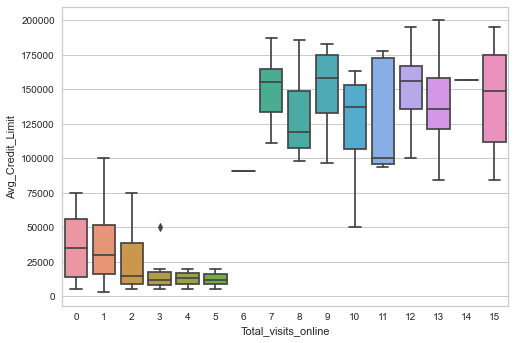

In [12]:
# Bivariate analysis
sns.boxplot(y="Avg_Credit_Limit", x="Total_visits_online", data=customerData1, orient="vertical")

#### Observations
<p> There are 2 distinct groups visible in the box plot above. The median credit limit for customers who logged in 6-15 visits online is significantly higher than the customers who logged in 0-5 visits online. </p>

<AxesSubplot:xlabel='Total_calls_made', ylabel='Avg_Credit_Limit'>

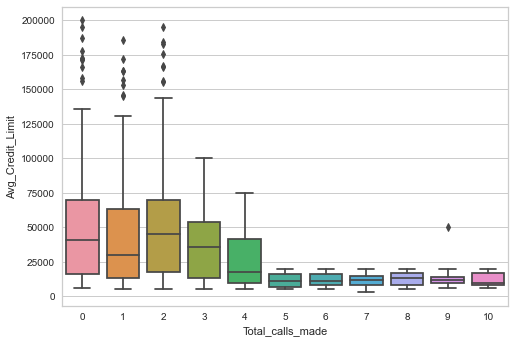

In [13]:
# Bivariate analysis
sns.boxplot(y="Avg_Credit_Limit", x="Total_calls_made", data=customerData1, orient="vertical")

#### Observations
<p> Customers who had a relatively high volume of calls made to the bank had a lower average credit limit. These are representative of the yearly calls made by the customer to the bank or customer service department.</p>

<AxesSubplot:xlabel='Total_calls_made', ylabel='Total_Credit_Cards'>

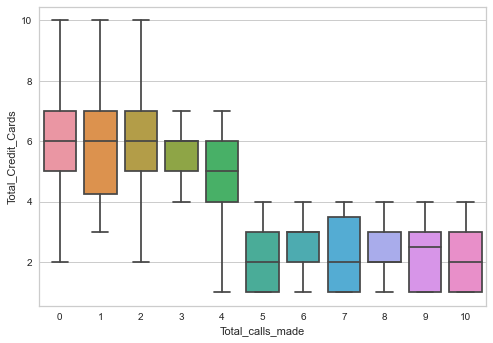

In [14]:
# Bivariate analysis
sns.boxplot(y="Total_Credit_Cards", x="Total_calls_made", data=customerData1, orient="vertical")

#### Observations
<p> The median number of credit cards products held by the customer was significantly higher for customers who made less number of calls to the bank/service department. </p>

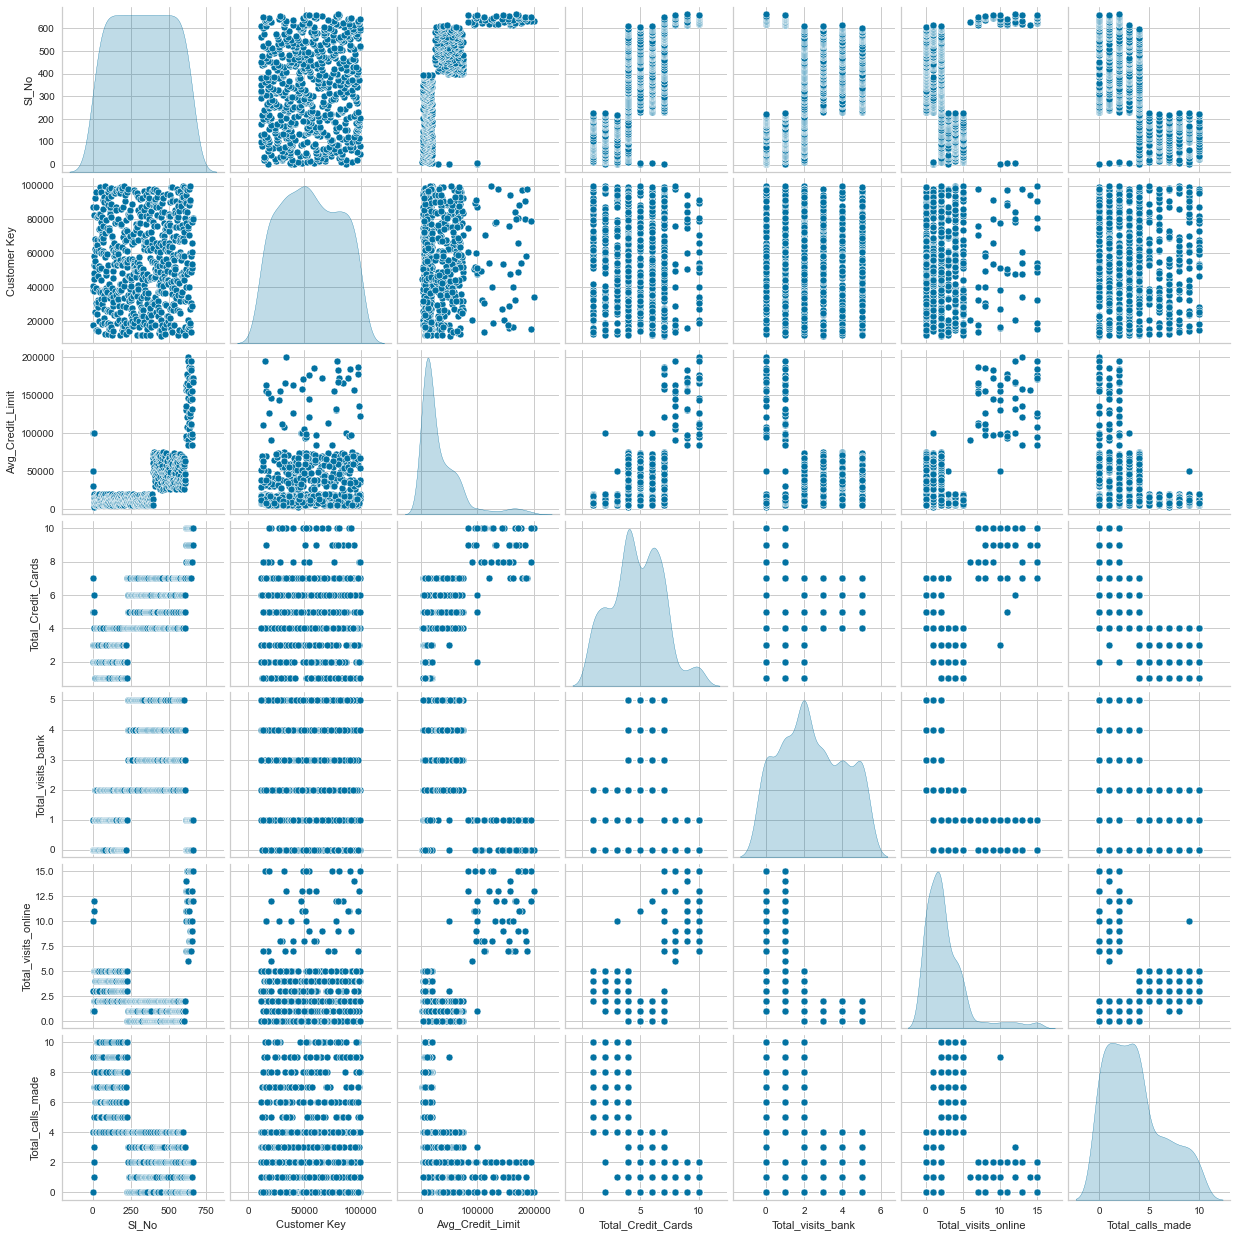

In [15]:
#Multivariate analysis
#pairplot 
sns.pairplot(customerData1,diag_kind='kde');

#### Observations
<p> The Avg_Credit_Limit diagonal graph shows that the data can be separated into 2-3 groups. With respect to Total_credit_cards, Total_visits_bank, Total_visits_online, the data can be separated mostly into 2 groups. We can also see 2 groups of data in graphs of Total_calls_made versus Total_Credit_Cards or Total_visits_bank or Total_visits_online as well. </p>

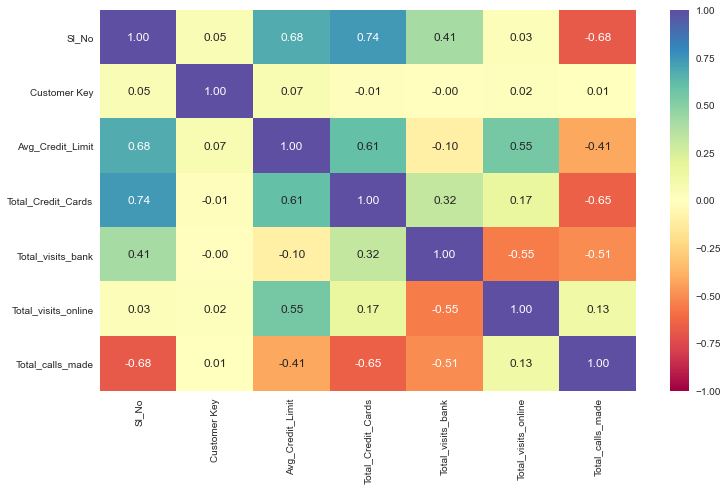

In [16]:
#Multivariate analysis
plt.figure(figsize=(12, 7))
sns.heatmap(
    customerData1.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

#### Observations
<ol>
    <li> We see some moderate (positive) correlation (0.65) between Avg_Credit_Limit and Total_Credit_Cards. There was also moderate (positive) correlation (0.55) between Avg_Credit_Limit and Total_visits_online. This indicates that as average credit limit increased, there was a similar trend in the number of credit cards that the customer had. </li>
    <li> There is some moderate (negative) correlation (-0.65) between Total_Credit_Cards and Total_calls_made. This can be interpreted that the customers who had more credit cards, made less calls to the service department. </li>
    <li> There is some moderate (negative) correlation (-0.55) between Total_visits_bank and Total_visits_online. So, as customers made more visits online, their visits to the bank were likely to go down. </li>
    <li> There is also some weak correlation (-0.41) between Avg_Credit_Limit and Total_calls_made. </li> </ol>

### 7. Data pre-processing section

<p> This section will have the following subsections:</p>
<ol>
    <li> Evaluation of outliers</li>
    <li> Feature Engineering </li>
    <li> Duplicate value treatment </li>
    <li> Scaling </li>

In [17]:
# Copying the dataframe again before we perform pre-processing on the data
customerData2 = customerData1.copy()

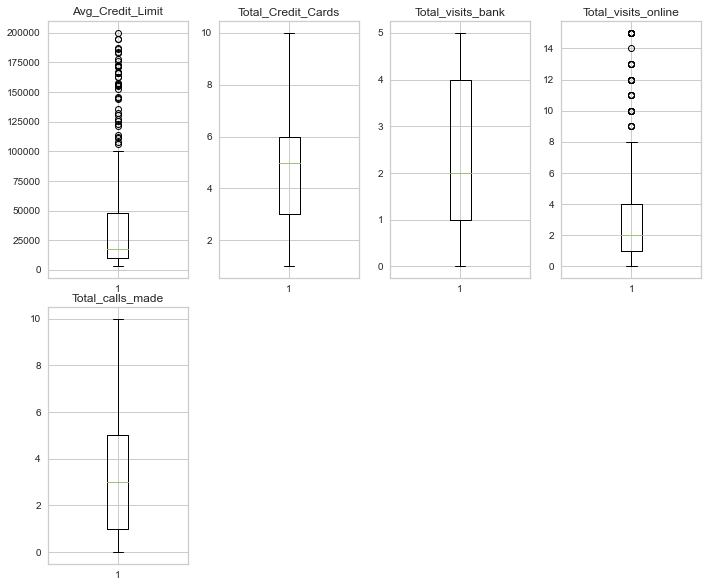

In [18]:
# 7.1 Evaluation of outliers
numerical_col = ["Avg_Credit_Limit", "Total_Credit_Cards", "Total_visits_bank", "Total_visits_online","Total_calls_made"]
plt.figure(figsize=(10, 20))

for i, variable in enumerate(numerical_col):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(customerData2[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

#### Observation
<p> As we observed during the EDA section as well, the outliers here can be meaningful data as customers who have multiple credit card products can have an Avg_Credit_Limit of above 100,000 dollars. Hence, we will retain the outlier data and not treat outliers for this analysis. </p>

In [19]:
#7.2 Duplicate observations
customerData2.duplicated().sum()

0

#### Observations
<p> We can see that none of the observations are duplicated and belong to unique customers.</p>

In [20]:
#7.3 Feature Engineering/dropping columns
#We drop the Sl_no and customer key columns as they are used for identification of customers and
#do not provide meaningful data
# Copying the dataframe again before we drop the columns
customerData3 = customerData2.copy()

In [21]:
customerData3.drop("Sl_No", axis=1, inplace=True)

In [22]:
customerData3.drop("Customer Key", axis=1, inplace=True)

In [23]:
# To see data types and non-null counts for all the columns
customerData3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Avg_Credit_Limit     660 non-null    int64
 1   Total_Credit_Cards   660 non-null    int64
 2   Total_visits_bank    660 non-null    int64
 3   Total_visits_online  660 non-null    int64
 4   Total_calls_made     660 non-null    int64
dtypes: int64(5)
memory usage: 25.9 KB


#### Observations
<p> After dropping the 2 columns, we have a total of 5 columns and no missing values. All 5 columns are continous variables. </p>

In [24]:
#7.4 Scaling
# selecting numerical columns
num_col = customerData3.select_dtypes(include=np.number).columns.tolist()

In [25]:
# Checking the columns
num_col

['Avg_Credit_Limit',
 'Total_Credit_Cards',
 'Total_visits_bank',
 'Total_visits_online',
 'Total_calls_made']

In [26]:
# scaling the dataset before clustering
scaler = StandardScaler()
subset = customerData3[num_col].copy()
subset_scaled = scaler.fit_transform(subset)

In [27]:
# creating a dataframe of the scaled columns
subset_scaled_customerData3 = pd.DataFrame(subset_scaled, columns=subset.columns)

In [28]:
# We wil be using two clustering techniques for customer segmentation
# we will create a copy of the above scaled data set and original data set to be used for hierarhical clustering while
# the one above will be used for k-means clustering
subset_scaled_customerData3hc = subset_scaled_customerData3.copy()
customerData3hc = customerData3.copy()

#### Observations
<p> Scaling is necessary for clustering in this analysis because the Avg_Credit_Limit has the range 0-200,000 dollars. While other variables such as Total_Credit_Cards has a range of 1-10. Since clustering will involve calculating distances between values, higher numbers will end up influencing the distance calculation significantly. To prevent this, we scaled all the columns such that they have a mean of 0 and a standard deviation of 1 (standard scaler). </p>

<p> This concludes the pre-processing section for the data analysis. </p>

### 8. K-means clustering

Number of Clusters: 1 	Average Distortion: 2.0069222262503614
Number of Clusters: 2 	Average Distortion: 1.4571553548514269
Number of Clusters: 3 	Average Distortion: 1.1466276549150365
Number of Clusters: 4 	Average Distortion: 1.0463825294774465
Number of Clusters: 5 	Average Distortion: 0.990772333470802
Number of Clusters: 6 	Average Distortion: 0.9430843103448057
Number of Clusters: 7 	Average Distortion: 0.9094290022428964
Number of Clusters: 8 	Average Distortion: 0.8891380888508975


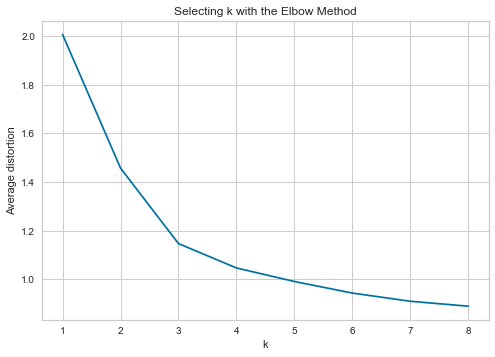

In [29]:
# We will use the scaled data and look at the elbow curve to determine how many clusters we should have
# Clusters are usually between 1 and 10. 
clusters = range(1, 9)
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters=k)
    model.fit(subset_scaled_customerData3)
    prediction = model.predict(subset_scaled_customerData3)
    distortion = (
        sum(
            np.min(cdist(subset_scaled_customerData3, model.cluster_centers_, "euclidean"), axis=1)
        )
        / subset_scaled_customerData3.shape[0]
    )

    meanDistortions.append(distortion)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average distortion")
plt.title("Selecting k with the Elbow Method")
plt.show()

#### Observations
<p> The k=8 point is close to the point where each point would likely be its own centroid, and k=1 in the graph would indicate the situation where there is only one cluster. The left hand side of the horizontal axis represents compression and the right hand side of the k axis represents accuracy. We want to find a point which is balanced, and a subjective way of choosing the clusters to look for the sharp bend in the curve. In the above example, we see that there is a sharp bend at k=2 and then there is a sharp bend at k=3 and again a slight bend at k=4. So appropriate values of k can be 2 or 3 or 4. <br>
    We will use the silhoutte scores to further determine whether we should choose k=2 or k=3 or k=4.</p>

For n_clusters = 2, the silhouette score is 0.41842496663230405)
For n_clusters = 3, the silhouette score is 0.5157182558882754)
For n_clusters = 4, the silhouette score is 0.35566706193773706)
For n_clusters = 5, the silhouette score is 0.2717470361094591)
For n_clusters = 6, the silhouette score is 0.25601504934752495)
For n_clusters = 7, the silhouette score is 0.24847804076958524)
For n_clusters = 8, the silhouette score is 0.22612684771528263)
For n_clusters = 9, the silhouette score is 0.21993804286766605)


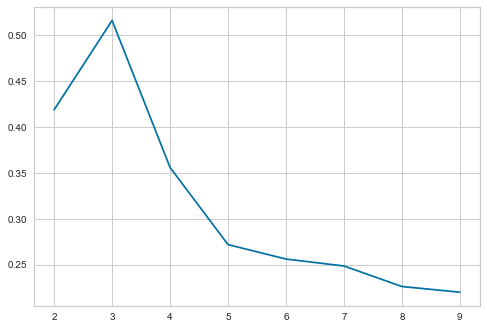

In [30]:
# Using the silhoutte score to determine which k we should choose (2,or 3, or 4)
sil_score = []
cluster_list = list(range(2, 10))
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict((subset_scaled_customerData3))
    # centers = clusterer.cluster_centers_
    score = silhouette_score(subset_scaled_customerData3, preds)
    sil_score.append(score)
    print("For n_clusters = {}, the silhouette score is {})".format(n_clusters, score))

plt.plot(cluster_list, sil_score)
plt.show()

#### Observations
<p> A silhoutte score of 1 means clusters are separated, and a score of 0 usually indicates overalapping in clusters.
    In the above graph, we see that a cluster of 2 has a silhouette score of 0.41, 3 clusters would be 0.51 and 4 clusters would have a score of 0.35. This indicates that an appropriate choice of k would be 3 clusters as it has the highest silhoutte score (or closest to 1). </p>

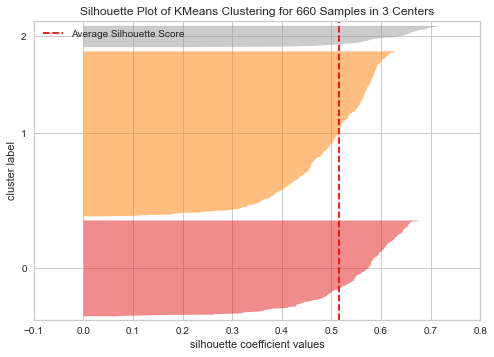

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 660 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [31]:
# Visualizing the clusters using silhoutteVisualizer
visualizer = SilhouetteVisualizer(KMeans(3, random_state=1))
visualizer.fit(subset_scaled_customerData3)
visualizer.show()

#### Observations
<p> The above diagram shows us the cluster labels and we can interpret separation between the clusters based on the silhoutte score. So, above shows that the 3 clusters (shown in different colors) are well separated at 0.51 silhoutte score. </p>

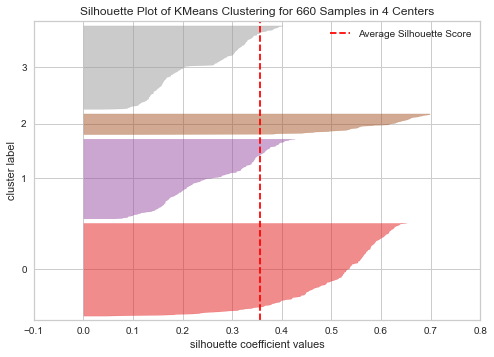

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 660 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [32]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(4, random_state=1))
visualizer.fit(subset_scaled_customerData3)
visualizer.show()

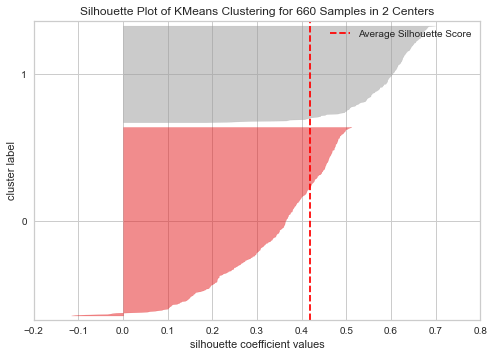

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 660 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [33]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(2, random_state=1))
visualizer.fit(subset_scaled_customerData3)
visualizer.show()

#### Observations
<p> The above two diagrams are for k=4 and k=2. For k=4, while the separation between cluster label 3 and cluster label 0 is good, the clusters all have different sizes (cluster label 3 and cluster label 0 are not similar how big the shape is their silhoutte). For k=2, clusters again have different sizes, and do not have good separation. In comparison, k=3 shows plots of similar thickness (thus clusters are likely to be similar sizes) as well as having good separation between the clusters. Thus, k=3 is the appropriate choice for k-means clustering for this dataset. </p>

In [34]:
# Based on elbow curve and silhoutte scores, we choose n_cluster = 3
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(subset_scaled_customerData3)

KMeans(n_clusters=3, random_state=0)

In [35]:
# adding kmeans cluster labels to the original and scaled dataframes

customerData3["K_means_segments"] = kmeans.labels_
subset_scaled_customerData3["K_means_segments"] = kmeans.labels_

In [36]:
# Cluster profiling section
cluster_profile = customerData3.groupby("K_means_segments").mean()

In [37]:
cluster_profile["count_in_each_segments"] = (
    customerData3.groupby("K_means_segments")["Avg_Credit_Limit"].count().values
)

In [38]:
# Display the final cluster profiles (n_clusters = 3)
cluster_profile.style.highlight_max(color="cyan", axis=0)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,count_in_each_segments
K_means_segments,,,,,,
0,33782.383420,5.515544,3.489637,0.981865,2.000000,386
1,12174.107143,2.410714,0.933036,3.553571,6.870536,224
2,141040.000000,8.740000,0.600000,10.900000,1.080000,50


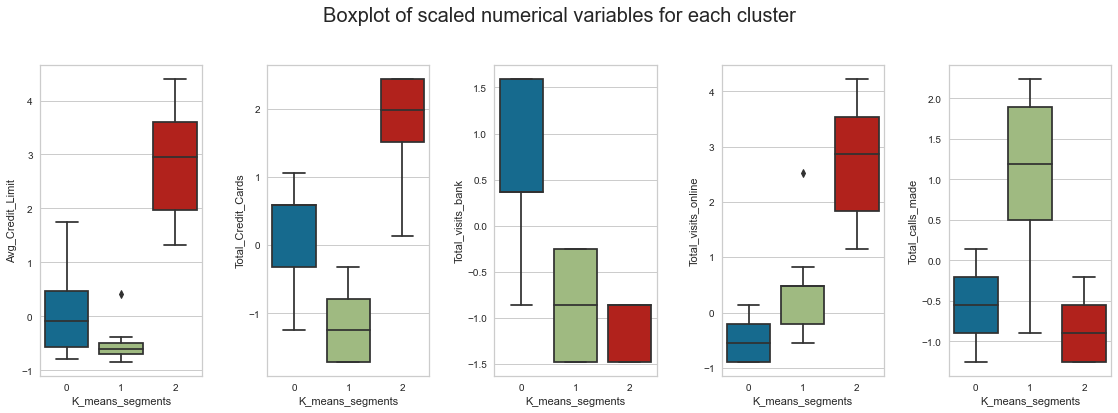

In [39]:
# To visualize the above information, box plots of the clusters for the scaled data
fig, axes = plt.subplots(1, 5, figsize=(16, 6))
fig.suptitle("Boxplot of scaled numerical variables for each cluster", fontsize=20)
counter = 0
for ii in range(5):
    sns.boxplot(
        ax=axes[ii],
        y=subset_scaled_customerData3[num_col[counter]],
        x=subset_scaled_customerData3["K_means_segments"],
    )
    counter = counter + 1

fig.tight_layout(pad=2.0)

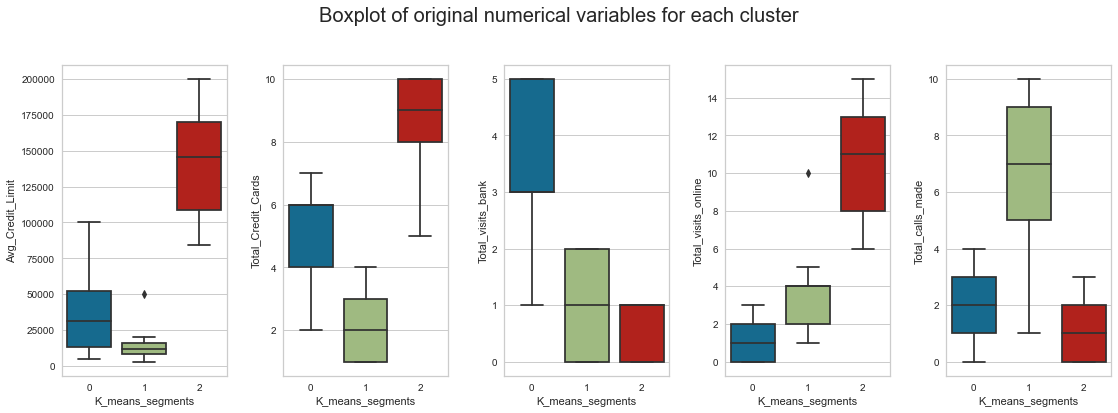

In [40]:
# For comparison, box plots of the non-scaled data for clusters
fig, axes = plt.subplots(1, 5, figsize=(16, 6))
fig.suptitle("Boxplot of original numerical variables for each cluster", fontsize=20)
counter = 0
for ii in range(5):
    sns.boxplot(ax=axes[ii], y=customerData3[num_col[counter]], x=customerData3["K_means_segments"])
    counter = counter + 1

fig.tight_layout(pad=2.0)

#### Observations for the cluster profile table and box plots
<p> The color cyan in the cluster profile table shows the highlighted maximum value for each column among the 3 clusters. </p>
<ol>
    <li> For cluster 0 (in the table): the customers in this cluster had an average credit limit (~33,000 dollars). The customers in this cluster had about 5 credit cards, which was the average across the entire data set. They also made more than one annual visit to the bank, but very few online visits. The customers in this cluster did make calls to the service department of the bank per year. This cluster had about 58% of the total customers (386 out of 660) and represents the largest group of similar customers in the dataset. </li>
    <li> For cluster 1 (in the table): the customers in this cluster had a very low average credit limit (below 10,000 dollars). They also held very few credit card products, visited the bank approximately once a year, but did visit online about 4 times a year. The customers in this cluster made the highest volume of calls to the service department. </li>
    <li> For cluster 2 (in the table):this cluster had customers with the highest average credit limit. They also held the maximum number of credit cards among the three clusters. They made the least number of visits to the bank, but the maximum number of online visits to the bank. Among the three clusters, this group of customers made the least number of calls to the service department. </li>
    <li> The box plots for the scaled data and unscaled data are similar. The plots make it easy to visualize that the cluster 2 (highest average credit limit) had the maximum number of credit cards and maximum number of online visits to the bank. Cluster 0 had the maximum number of visits to the bank but Cluster 1 (which had the lowest average credit limit) made the maximum number of calls to the service department. </li>

### 9. Hierarchical Clustering

In [41]:
# We will calculate the cophenetic correlation for the combination of distance metrics
# and linkage methods to decide what combination we should use for hierarchical clustering

# list of distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]

# list of linkage methods
linkage_methods = ["single", "complete", "average","weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(subset_scaled_customerData3hc, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(subset_scaled_customerData3hc))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm

Cophenetic correlation for Euclidean distance and single linkage is 0.7391220243806552.
Cophenetic correlation for Euclidean distance and complete linkage is 0.8599730607972423.
Cophenetic correlation for Euclidean distance and average linkage is 0.8977080867389372.
Cophenetic correlation for Euclidean distance and weighted linkage is 0.8861746814895477.
Cophenetic correlation for Chebyshev distance and single linkage is 0.7382354769296767.
Cophenetic correlation for Chebyshev distance and complete linkage is 0.8533474836336782.
Cophenetic correlation for Chebyshev distance and average linkage is 0.8974159511838106.
Cophenetic correlation for Chebyshev distance and weighted linkage is 0.8913624010768603.
Cophenetic correlation for Mahalanobis distance and single linkage is 0.7058064784553605.
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.6663534463875359.
Cophenetic correlation for Mahalanobis distance and average linkage is 0.8326994115042134.
Cophenetic co

In [42]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.8977080867389372, which is obtained with Euclidean distance and average linkage.


#### Observations
<p> The cophenetic correlation calculates the correlation between the distance metric and dendogram distance. If this correlation is high, then it indicates that the dendogram made with that distance metric will be more faithful to the original data. <br>
    In the above analysis, the euclidean distance and average linkage method had a cophenetic correlation of 0.89 approximately. </p>

In [43]:
# We could not include centroid and ward in the above section because the distance metric is required to be euclidean. 
# Now that we  have know that we have a high cophenetic correlation with euclidean distance, we will 
# check the cophenetic scores of euclidean distance and centroid linkage
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for lm in linkage_methods:
    Z = linkage(subset_scaled_customerData3hc, metric="euclidean", method=lm)
    c, coph_dists = cophenet(Z, pdist(subset_scaled_customerData3hc))
    print("Cophenetic correlation for {} linkage is {}.".format(lm, c))
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = "euclidean"
        high_dm_lm[1] = lm

Cophenetic correlation for single linkage is 0.7391220243806552.
Cophenetic correlation for complete linkage is 0.8599730607972423.
Cophenetic correlation for average linkage is 0.8977080867389372.
Cophenetic correlation for centroid linkage is 0.8939385846326323.
Cophenetic correlation for ward linkage is 0.7415156284827493.
Cophenetic correlation for weighted linkage is 0.8861746814895477.


In [44]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} linkage.".format(
        high_cophenet_corr, high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.8977080867389372, which is obtained with average linkage.


#### Observation
<p> The highest cophenetic correlation is 0.89 approximately and the combination is euclidean distance and average linkage. </p>

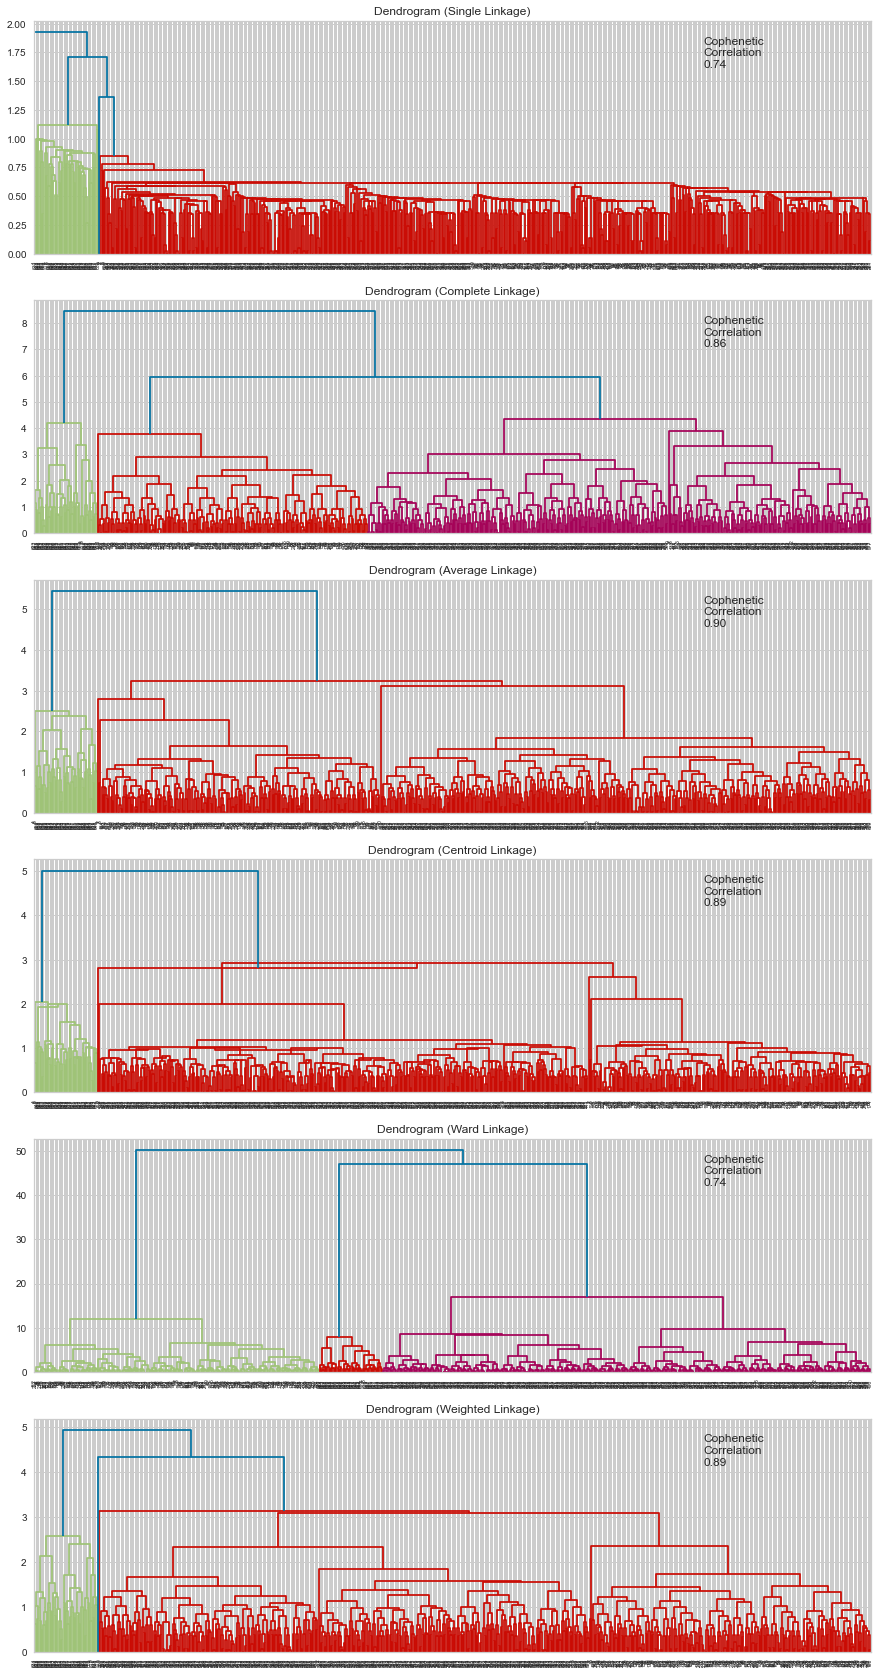

In [45]:
#To generate the dendograms
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(subset_scaled_customerData3hc, metric="euclidean", method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(subset_scaled_customerData3hc))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

#### Observations
<p> From the above set of dendograms, we will look at the one with euclidean distance and average linkage since that had the highest cophenetic correlation score. If we cut the dendogram at 5, we would end up with a large portion of the right side of data under one umbrella. Hence, we can choose the appropriate number of clusters to be 3  from the above graph. </p>

In [46]:
#Before we interpret the results for cluster profile with 3 clusters, we will try 
# hierarchical clustering with 2 and 4 clusters with euclidean and average linkage
HCmodel = AgglomerativeClustering(n_clusters=2, affinity="euclidean", linkage="average")
HCmodel.fit(subset_scaled_customerData3hc)

AgglomerativeClustering(linkage='average')

In [47]:
subset_scaled_customerData3hc["HC_Clusters"] = HCmodel.labels_
customerData3hc["HC_Clusters"] = HCmodel.labels_

In [48]:
cluster_profilehc = customerData3hc.groupby("HC_Clusters").mean()

In [49]:
cluster_profilehc["count_in_each_segments"] = (
    customerData3hc.groupby("HC_Clusters")["Avg_Credit_Limit"].count().values
)

In [50]:
# To see some customers in the group
for cl in customerData3hc["HC_Clusters"].unique():
    print("In cluster {}, the following Avg_Credit_Limit customers are present:".format(cl))
    print(customerData3hc[customerData3hc["HC_Clusters"] == cl]["Avg_Credit_Limit"].unique())
    print()

In cluster 0, the following Avg_Credit_Limit customers are present:
[100000  50000  30000  20000  15000   5000   3000  10000  13000  11000
   9000   6000   8000  19000  16000  18000  17000  14000  12000   7000
  73000  49000  67000  61000  75000  48000  56000  72000  70000  51000
  69000  40000  44000  31000  37000  65000  46000  74000  58000  39000
  52000  33000  47000  71000  41000  59000  64000  45000  54000  66000
  27000  43000  36000  25000  57000  26000  38000  35000  34000  28000
  63000  29000  68000  42000  62000  32000  60000  55000]

In cluster 1, the following Avg_Credit_Limit customers are present:
[100000 157000  94000 163000 131000  96000 136000 121000 158000 108000
 166000 176000 178000  91000 156000 146000  84000 155000 200000 195000
 187000 106000 114000 126000 173000 153000 184000 123000 144000  97000
  98000 127000 171000 186000 183000 111000 112000 132000  95000 172000
  99000 145000 167000]



#### Observations
<p> When we have 2 clusters, we can see that we are missing out separating a group of customers who have low average credit limit. The two groups while having a different count of customers have low average credit limit customers sprinkled across both groups. Thus, 2 will not be the correct for number of clusters. </p>

In [51]:
# n_clusters = 4 for this section
HCmodel = AgglomerativeClustering(n_clusters=4, affinity="euclidean", linkage="average")
HCmodel.fit(subset_scaled_customerData3hc)

AgglomerativeClustering(linkage='average', n_clusters=4)

In [52]:
subset_scaled_customerData3hc["HC_Clusters"] = HCmodel.labels_
customerData3hc["HC_Clusters"] = HCmodel.labels_

In [53]:
cluster_profilehc = customerData3hc.groupby("HC_Clusters").mean()

In [54]:
cluster_profilehc["count_in_each_segments"] = (
    customerData3hc.groupby("HC_Clusters")["Avg_Credit_Limit"].count().values
)

In [55]:
# To see some customers in the group
for cl in customerData3hc["HC_Clusters"].unique():
    print("In cluster {}, the following Avg_Credit_Limit customers are present:".format(cl))
    print(customerData3hc[customerData3hc["HC_Clusters"] == cl]["Avg_Credit_Limit"].unique())
    print()

In cluster 3, the following Avg_Credit_Limit customers are present:
[100000]

In cluster 0, the following Avg_Credit_Limit customers are present:
[50000 20000 15000  5000  3000 10000 13000 11000  9000  6000  8000 19000
 16000 18000 17000 14000 12000  7000]

In cluster 2, the following Avg_Credit_Limit customers are present:
[50000 30000 10000  8000 17000 19000 20000 13000 16000 12000  5000  7000
 11000  9000 18000  6000 15000 14000 73000 49000 67000 61000 75000 48000
 56000 72000 70000 51000 69000 40000 44000 31000 37000 65000 46000 74000
 58000 39000 52000 33000 47000 71000 41000 59000 64000 45000 54000 66000
 27000 43000 36000 25000 57000 26000 38000 35000 34000 28000 63000 29000
 68000 42000 62000 32000 60000 55000]

In cluster 1, the following Avg_Credit_Limit customers are present:
[100000 157000  94000 163000 131000  96000 136000 121000 158000 108000
 166000 176000 178000  91000 156000 146000  84000 155000 200000 195000
 187000 106000 114000 126000 173000 153000 184000 123000 144

#### Observations
<p> When we have 4 clusters, we see that one cluster has only one customer. Hence, 4 is not the appropriate number for clusters. </p>

In [56]:
# The appropriate number of clusters is 3 from above analysis
HCmodel = AgglomerativeClustering(n_clusters=3, affinity="euclidean", linkage="average")
HCmodel.fit(subset_scaled_customerData3hc)

AgglomerativeClustering(linkage='average', n_clusters=3)

In [57]:
subset_scaled_customerData3hc["HC_Clusters"] = HCmodel.labels_
customerData3hc["HC_Clusters"] = HCmodel.labels_

In [58]:
cluster_profilehc = customerData3hc.groupby("HC_Clusters").mean()

In [59]:
cluster_profilehc["count_in_each_segments"] = (
    customerData3hc.groupby("HC_Clusters")["Avg_Credit_Limit"].count().values
)

In [60]:
# To see some customers in the group
for cl in customerData3hc["HC_Clusters"].unique():
    print("In cluster {}, the following Avg_Credit_Limit customers are present:".format(cl))
    print(customerData3hc[customerData3hc["HC_Clusters"] == cl]["Avg_Credit_Limit"].unique())
    print()

In cluster 0, the following Avg_Credit_Limit customers are present:
[100000  50000  30000  10000   8000  17000  19000  20000  13000  16000
  12000   5000   7000  11000   9000  18000   6000  15000  14000  73000
  49000  67000  61000  75000  48000  56000  72000  70000  51000  69000
  40000  44000  31000  37000  65000  46000  74000  58000  39000  52000
  33000  47000  71000  41000  59000  64000  45000  54000  66000  27000
  43000  36000  25000  57000  26000  38000  35000  34000  28000  63000
  29000  68000  42000  62000  32000  60000  55000]

In cluster 2, the following Avg_Credit_Limit customers are present:
[50000 20000 15000  5000  3000 10000 13000 11000  9000  6000  8000 19000
 16000 18000 17000 14000 12000  7000]

In cluster 1, the following Avg_Credit_Limit customers are present:
[100000 157000  94000 163000 131000  96000 136000 121000 158000 108000
 166000 176000 178000  91000 156000 146000  84000 155000 200000 195000
 187000 106000 114000 126000 173000 153000 184000 123000 144000 

#### Observations
<p> In the above distribution, we see two clusters that have similar count of customers and one cluster that has less number of customers (who mostly have low average credit limit) as compared to above two. </p>

In [61]:
# Display the table with cluster profile
cluster_profilehc.style.highlight_max(color="cyan", axis=0)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,count_in_each_segments
HC_Clusters,,,,,,
0,33713.178295,5.511628,3.485788,0.984496,2.005168,387
1,141040.000000,8.740000,0.600000,10.900000,1.080000,50
2,12197.309417,2.403587,0.928251,3.560538,6.883408,223


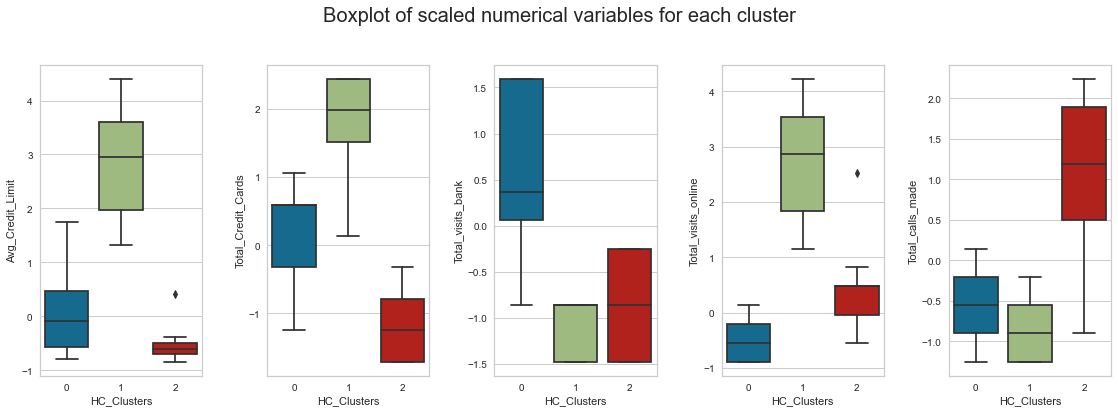

In [62]:
fig, axes = plt.subplots(1, 5, figsize=(16, 6))
fig.suptitle("Boxplot of scaled numerical variables for each cluster", fontsize=20)
counter = 0
for ii in range(5):
    sns.boxplot(ax=axes[ii], y=subset_scaled_customerData3hc[num_col[counter]], x=subset_scaled_customerData3hc["HC_Clusters"])
    counter = counter + 1


fig.tight_layout(pad=2.0)

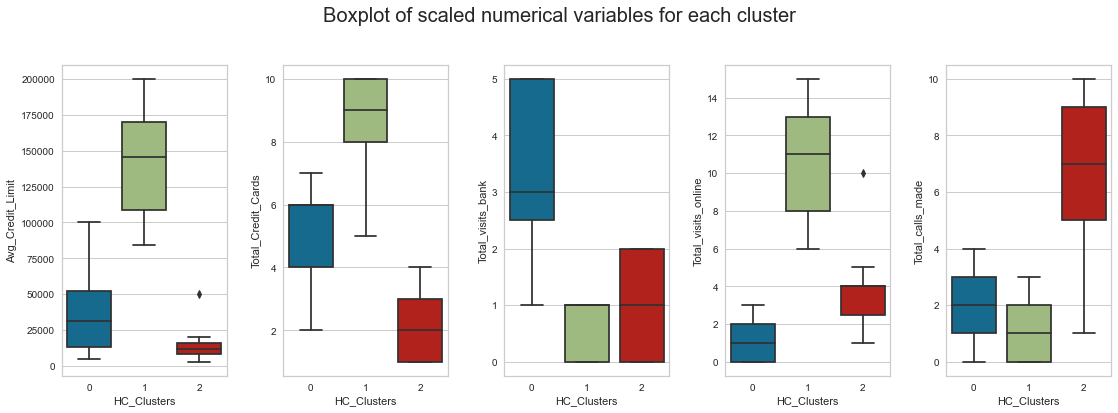

In [63]:
fig, axes = plt.subplots(1, 5, figsize=(16, 6))
fig.suptitle("Boxplot of scaled numerical variables for each cluster", fontsize=20)
counter = 0
for ii in range(5):
    sns.boxplot(ax=axes[ii], y=customerData3hc[num_col[counter]], x=customerData3hc["HC_Clusters"])
    counter = counter + 1


fig.tight_layout(pad=2.0)

#### Observations
<p> We can see that the hierarchical clustering has results similar to K-means clustering. <p>
    <ol>
        <li> For cluster 0 - this group of customers has an average credit limit of 33,000 dollars, they also had the maximum number of visits to the bank among all the clusters, and also the maximum number of customers (~ 58%) belong to this cluster. </li>
        <li> For cluster 1 - this group of customers has high average credit limit (141,000 dollars approximately) and also has the maximum number of credit card products among the three clusters. This group of customers also had the maximum number of visits online among the three clusters. While only 50 customers belonged to this customer (so smallest among the 3 clusters), they also made the minimum calls to the service center and bank. </li>
        <li> For Cluster 2 - this group of customer had the maximum number of calls made to the service center or the bank. 223 customers (~33%) belonged to this customer and had a low average credit limit. They also did not have much visit to the bank, and had approximately on average 2 credit cards. </li>
        <li> The box plot for the scaled data set and unscaled data set show similar observations as listed above.</li>
        <ol>

### 10. Comparison of k-means clustering and hierarchical clustering

In [64]:
# Display the final cluster profiles (n_clusters = 3) for k-means 
cluster_profile.style.highlight_max(color="cyan", axis=0)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,count_in_each_segments
K_means_segments,,,,,,
0,33782.383420,5.515544,3.489637,0.981865,2.000000,386
1,12174.107143,2.410714,0.933036,3.553571,6.870536,224
2,141040.000000,8.740000,0.600000,10.900000,1.080000,50


In [65]:
# Display the table with cluster profile for hierarchical clustering (n_clusters = 3)
cluster_profilehc.style.highlight_max(color="cyan", axis=0)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,count_in_each_segments
HC_Clusters,,,,,,
0,33713.178295,5.511628,3.485788,0.984496,2.005168,387
1,141040.000000,8.740000,0.600000,10.900000,1.080000,50
2,12197.309417,2.403587,0.928251,3.560538,6.883408,223


#### Observations
<p> From the cluster profile table for K-means and hierarchical clustering, we can conclude the following: </p>
<ol>
    <li> The appropriate number of clusters for both techniques was 3. </li>
    <li> The elbow curve and silhoutte score was used to determine the appropriate number of clusters for k-means clustering, while dendogram and cophenetic correlation scores were used to arrive at the appropriate number of clusters for hierarchical clustering. </li>
    <li> The cluster profiles for the 3 clusters were similar for both techniques. The difference was very slight (e.g. 386 customers were for Cluster 0 for k-means, while 387 customers were grouped into Cluster 0 for hierarchical clustering). </li>
    <li> Both cluster profile techniques showed that the maximum number of calls made to the service center was the group of customers who had a very low average credit limit.</li>
    <li> Both cluster profile techniques showed that the higher average credit limit group of customers tended to have more credit card products. </li>
    <li> In terms of processing time, hierarchical clustering uses dendograms which take longer to generate as compared to k-means clustering. </li>

### 11. Insights  and recommendations

#### Insights
<ol>
    <li> For all the credit cards held by a customer overall, the mean customer average cedit limit was 34,574 dollars and 75% of the customers had an average credit limit of 48,000 dollars. </li>
    <li> Majority of the customers had a total of about 4-7 credit card products. </li>
    <li> Customers who did not login to the bank (between 125-140 customers) made personal visits to the bank on site. This indicates that ~18% of teh customers might prefer to visit the bank in-person. </li>
    <li> Customers who had a higher average credit limit also had logged comparitively more number of online visits. </li>
    <li> Customers who had relatively high volume of calls of the bank had an average lower credit limit. This includes calls made to the service department. There is no information about fees or nature of teh calls, but indicates that the customers who had lower average credit limits  may have had issues with their credit card services. </li>
    <li> There is scope to increase/expand the customer base by bringing in new customers as the higher average credit limit segment of customers had number of credit card products. </li>

#### Recommendations
<ol>
    <li> ~18 percent of teh customers who did not log any visits to the bank site or their online account made personal visits to the bank annually. The bank should continue to offer onsite services to these customers while also offering demos or training to familiarize the customers with the bank's online portal. Improving the online experience for these customers can result in lower volume of calls made to the service department and help the service department focus on issues with the products that cannot be solved by the customer using an online account. </li>
    <li> The bank can invest in improving the credit card products for customers who had lower credit limits so as to reduce the volume of calls to the service department. </li>
    <li> The service department should definitely focus on improving services for customers who fall into the cluster where customers have on average credit limits of 12,000 dollars since these customers have the highest number of calls among the different group of customers. </li>
    <li> When customers had more credit card products, the total calls made were less as compared to customers who had 2-4 credit cards. Thus, the marketing department can target existing customers also for credit card products. </li>
    <li> The bank can collect data on income of the existing customers so as to facilitate further data analysis and improve the strategy for targeted marketing which will ultimately expand the customer base. </li>
    <li> The customer segmentation analysis can be used to identify new customers who will fall into the cluster that has high average credit limit customers with high number of credit card products. </li>